In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

C:\Users\scanimage\AppData\Local\Temp\ipykernel_32604\912229180.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import sys
import os
import glob
import importlib
import multiprocessing as mp
import itertools
import math
import random 

from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import colors as mcolors
import scipy.sparse as sparse
import scipy.io as sio
import scipy.stats as stats
import scipy.spatial.distance as dist
import numpy as np
import h5py
from tqdm import tqdm
import pandas as pd
#import tables
#import deepdish as dd

sys.path.append('C:\\Users\\scanimage\\Documents\\JJM\\post_cnmfe_analysis\\')
import python_utils_jjm as jjm_utils

In [3]:
os.listdir('F:\\JJM\\miniscope_analysis\\introfigure\\eg_fig')

['13-Nov_19_23_39_sorted_output.mat',
 'MAX_Substack (2000-3000).tif',
 'memmap_0000memmap_0004_resized.h5']

In [7]:
results_file = 'F:\\JJM\\miniscope_analysis\\introfigure\\cnmfe_wt_openfield\\13-Nov_19_23_39_out.mat'
results = sio.loadmat(results_file)

In [9]:
results['A']

<360000x440 sparse matrix of type '<class 'numpy.float64'>'
	with 222364 stored elements in Compressed Sparse Column format>

##plot contours from A, spatial profile of detected neurons, on correlation image (Cn) or image from file 

In [72]:
#input list to plot
to_plot_df = pd.read_csv('F:\\JJM\\miniscope_analysis\\introfigure\\cnmfe_wt_openfield\\13-Nov_19_23_39_cell_choices.csv')
to_plot = list(to_plot_df['1'].values-1)
#to_plot

In [73]:
# A is stored as "sparse matrix", convert to dense 
sparse.issparse(results['A'])
A = np.array(results['A'].todense())

In [74]:
# Correlation image 
#Cn = results['Cn']
Cn = np.transpose(img_from_file)
c, d1, d2 = np.shape(Cn)
d, nr = np.shape(A)

In [75]:
# threshold for contour
maxthr=0.4
nrgthr=0.9

In [76]:
# mesh grid that represents the x, y dimensions of the image
x, y = np.mgrid[0:d1:1, 0:d2:1]

In [77]:
#create plot
#%matplotlib inline
#ax = plt.gca()
#cmap=None
#plt.imshow(np.transpose(Cn), interpolation=None, cmap='gray', vmin=np.percentile(Cn[~np.isnan(Cn)], 1),vmax=np.percentile(Cn[~np.isnan(Cn)], 99))

In [78]:
coordinates = []
#cm is an array of tuples 
cm = jjm_utils.com(A, d1, d2)

In [79]:
len(results['C'])

440

In [80]:
#[int(i) for i in np.linspace(1,126,126)]

In [81]:
#to_plot = [1, 3, 5, 6, 12, 13, 14, 20, 24, 51]
#to_plot = [int(i) for i in np.linspace(0,439,150)]

In [85]:
img_file = 'F:\\JJM\\miniscope_analysis\\introfigure\\eg_fig\\MAX_Substack (2000-3000).jpg'
img_from_file = mpimg.imread(img_file)  

In [83]:
list(mcolors.TABLEAU_COLORS.values())

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

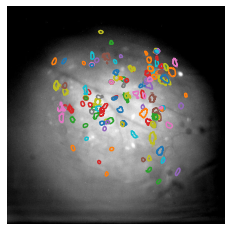

In [92]:
rotated_image = np.rot90(img_from_file, k=-1)
rotated_image = np.rot90(rotated_image, k=-1)
#rotated_image = img_from_file

maxthr = 0.5
fig, ax = plt.subplots()

ax.imshow(rotated_image, cmap='gray')

ax.axis('off')

if to_plot:
    cells_to_plot = to_plot

cells_to_plot

if to_plot:
    cells_to_plot = to_plot
else:
    max_number=nr
    cells_to_plot = range(np.minimum(nr, max_number))

# Generate a list of distinct colors for contours
contour_colors = [random.choice(list(mcolors.TABLEAU_COLORS.values())) for _ in range(len(cells_to_plot))]    
    
# Generate a list of distinct colors for contours
#tableau_colors = list(mcolors.TABLEAU_COLORS.values())
#contour_colors = random.sample(tableau_colors, len(cells_to_plot))
       
for i, color in zip(cells_to_plot, contour_colors):
    #pars = dict(kwargs)
    Bvec = A[:, i].flatten()
    #normalize spatial contours to 1 
    Bvec /= np.max(Bvec)
    thr = maxthr
# reshape to dimensions of image 
    Bmat = np.reshape(Bvec, (d1, d2), order='F')
    colors = 'r'
    cs = plt.contour(y, x, Bmat, [thr], colors=color)
    plt.savefig('F:\\JJM\\miniscope_analysis\\introfigure\\eg_fig\\w_contours_rot_180.png')

In [59]:
cells_to_plot = [int(i) for i in np.linspace(0,40,20)]

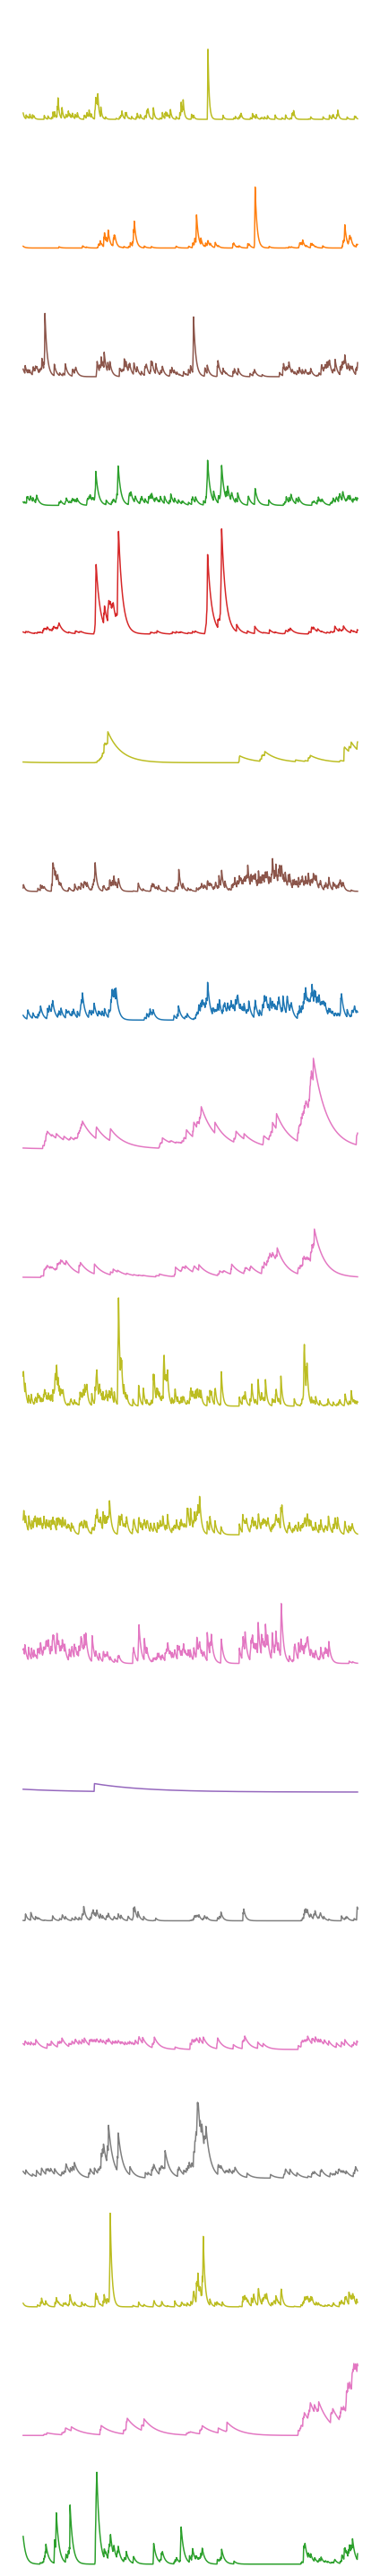

In [60]:
region_to_plot = (2000,3000)
N = len(cells_to_plot)
fig, axs = plt.subplots(N, 1, figsize=(6, 2 * N), sharey=True) 

for ax in axs:
    ax.axis('off')

for i, color, ax in zip(cells_to_plot, contour_colors, axs):
    ax.plot(results['C'][i][region_to_plot[0]:region_to_plot[1]], color=color)
    
plt.tight_layout()
#plt.savefig('F:\\JJM\\miniscope_analysis\\figures\\GRIN011_egforfigure\\MAX_GRIN011_H10_M19_S59msCam9_390_440_traces.svg')
plt.show()

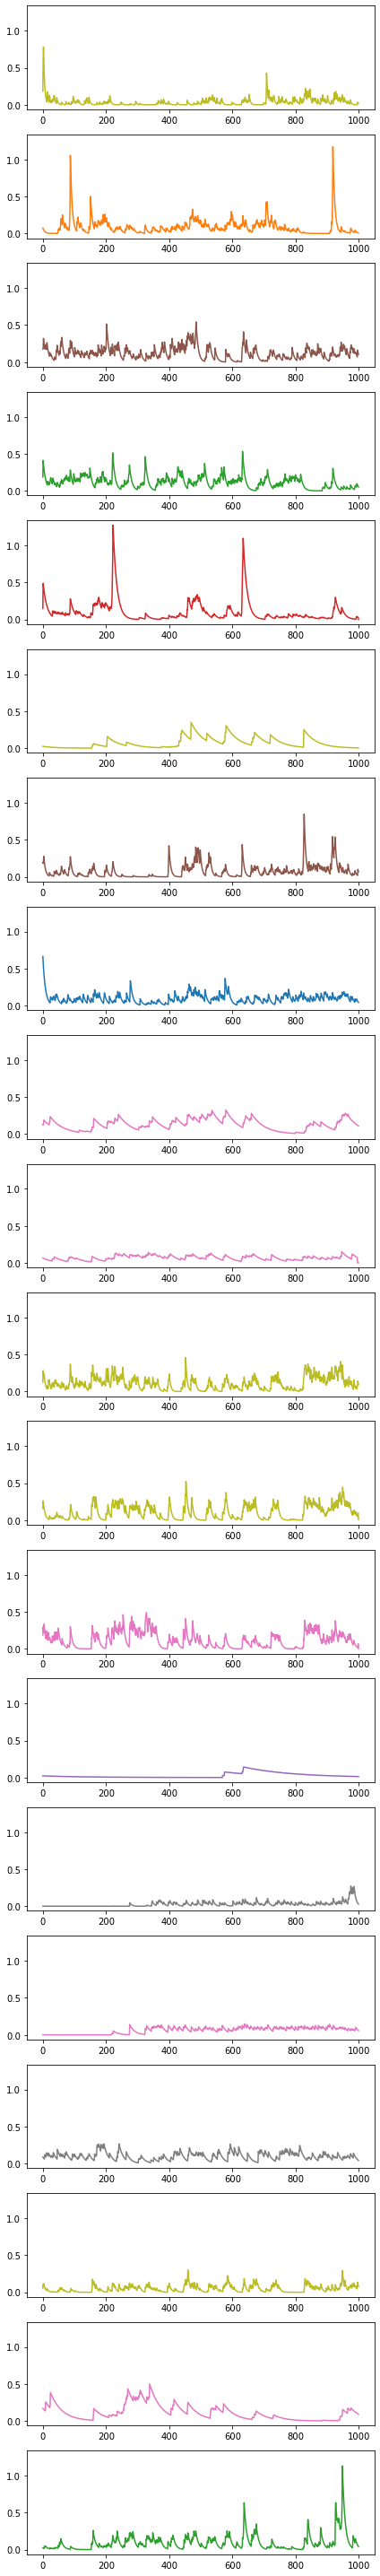

In [61]:
##plot one with scale
region_to_plot = (4000,5000)
to_plot_scale =[0, 3]
N = len(cells_to_plot)
fig, axs = plt.subplots(N, 1, figsize=(6, 2 * N), sharey=True) 

for ax in axs:
    ax.axis('on')

for i, color, ax in zip(cells_to_plot, contour_colors, axs):
    ax.plot(results['C'][i][region_to_plot[0]:region_to_plot[1]], color=color)
    
plt.tight_layout()
plt.savefig('F:\\JJM\\miniscope_analysis\\introfigure\\eg_fig\\_traces_scale.svg')
plt.show()

In [ ]:
len(results['C'][1])

In [ ]:
coordinates = []
cm = jjm_utils.com(A, d1, d2)

if to_plot:
    cells_to_plot = to_plot

cells_to_plot

if to_plot:
    cells_to_plot = to_plot
else:
    max_number=nr
    cells_to_plot = range(np.minimum(nr, max_number))

for i in cells_to_plot:
    #pars = dict(kwargs)
    Bvec = A[:, i].flatten()
    #normalize spatial contours to 1 
    Bvec /= np.max(Bvec)
    thr = maxthr
# reshape to dimensions of image 
    Bmat = np.reshape(Bvec, np.shape(Cn), order='F')
    colors = 'r'
    cs = plt.contour(y, x, Bmat, [thr], colors=colors)
    plt.savefig('F:\\JJM\\miniscope_analysis\\figures\\GRIN011_egforfigure\\MAX_GRIN011_H10_M19_S59msCam9_390_440_w_contours.png')

In [ ]:
plt.savefig('F:\\JJM\\miniscope_analysis\\figures\\GRIN011_egforfigure\\MAX_GRIN011_H10_M19_S59msCam9_390_440_w_contours.png')

In [ ]:
cs